# Solución de ecuaciones no lineal como alguna transcendental.

La solución de una ecuación no lineal consiste en determinar aquel valor de $x$ en que la función se hace cero, i.e., encontrar $x$ tal que $f(x)=0$.

Algunos ejemplos de funciones no lineales serían:

$$e^{x^2} +cte=0$$

$$y+\tan(x)=0$$

La metodología computacional para resolver esto, es proponer una *adivinanza* de solución y luego, iterar un proceso para encontrar una mejor solución. Entre mejor sea la adivinanza, menos pasos serán necesarios. El proceso iterativo se hará mediante una sucesión, tal que la *adivinanza* será el paso inicial $x_0$ y se planteará algún método numérico para determinar el $x_1$, $x_2$ y así sucesivamente, tal que el valor $x_n$ se aproxime a la raíz real.

$$
x_0,x_1,x_2,\cdots,x_n \rightarrow \alpha
$$

Siendo $\alpha$ la raíz real, $\alpha=x_n\pm error$.

Propongamos una función de prueba

$$f(x)=x^3-10x^2+5$$

El primer truco será visualizar a la función para determinar la *adivinanza* o el paso $x_0$

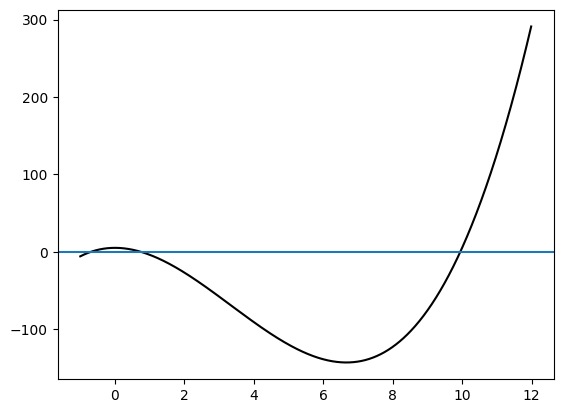

In [ ]:
from numpy import *
from pylab import*

# def funcion(x):
#   y=x**3-10*x**2+5
#   return y

funcion=lambda x: x**3-10*x**2+5
x=arange(-1,12,0.01)
plot(x,funcion(x),'k')
axhline()

Todo queda por encontrar el mejor método numérico que te ayude a iterar el proceso de forma más eficiente.

## Búsqueda incremental

La primera aproximación es muy sencilla, prácticamente es un método de prueba y error. Se hará lo siguiente.

1. Empiezas con $x_0$ y caminas un paso $h$ para tener un $x_1$, evaluas la función en cada punto. Aplicas el teorema del valor intermedio*, si hay una raíz en el intervalo, habrá cambio de signo, lo cual se verá así $f(x_0)\cdot f(x_1)< 0$. Si hay cambio raíz y es una función creciente, entonces f(x_0)< 0 y f(x_1)>0, caso contrario, para una función decreciente, se tendrá  f(x_0)< 0 y f(x_1)< 0.

2. Si no hay cambio de raíz, entonces $f(x_0)\cdot f(x_1)>0$, habrá que repetir el procedimiento, lo que haremos será renombrar el intervalo. La nueva $x0$ será la vieja $x1$ y la nueva $x1=x0+h$.

3. Repetimos $n$ veces, hasta encontrar la raíz. La raíz real será la raíz encontrada numéricamente más un error. Que en este caso será proporcional al tamaño de paso $h$.

$$
\alpha=x_n\pm h
$$


* Teorema del valor intermedio:

Sea $f:[a,b]\to \mathbb {R}$ una función continua en $[a,b]$ tal que $f(a)< f(b)$. Entonces, para todo $u\in (f(a),f(b))$ se tiene que existe $c\in (a,b)$ tal que $f(c)=u$.

En particular, usaremos u=0, que es el teorema de Bolzano, que dice lo siguiente:

Sea $f:[a,b]\to \mathbb {R}$ una función real continua en $[a,b]$ con $f(a)< 0 < f(b)$ entonces existe al menos un punto $c\in (a,b)$ tal que $f(c)=0$.

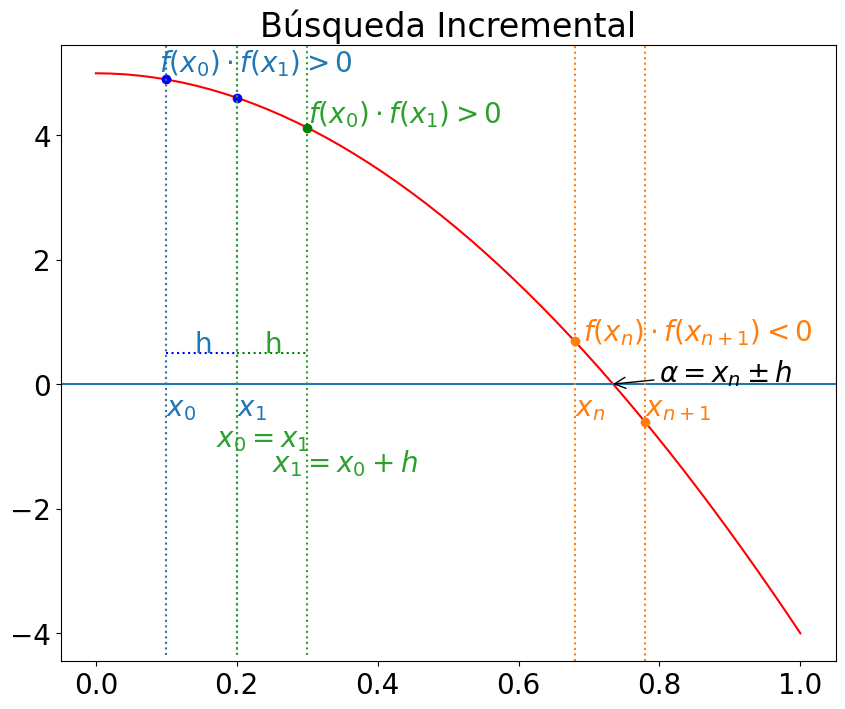

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8] # ancho, alto de figuras
plt.rcParams["font.size"] = 20

f=lambda x: x**3-10*x**2+5

def grafica_BI(f,x0):
    #x0 = 0.1
    h=0.1
    x1=x0+h
    x = np.linspace(0, 1)
    #paso 1
    plt.title('Búsqueda Incremental')
    plt.plot(x, f(x), 'r', x0, f(x0),'ob',x1, f(x1),'ob')
    plt.axhline();
    plt.annotate(r"$\alpha=x_n\pm h$", xy=[0.73, 0], xytext=[0.8, 0.05],
                 arrowprops=dict(arrowstyle='->'),)
    plt.annotate(r"$x_{0}$", xy=[x0, 0], xytext=[x0, -0.5],color='tab:blue')
    plt.hlines(0.5, x0, x1, colors='b', linestyles=':')
    plt.annotate(r"h", xy=[0.05, 0.5], xytext=[x0+0.04, 0.52],color='tab:blue')
    plt.annotate(r"$x_{1}$", xy=[x1, 0], xytext=[x1, -0.5],color='tab:blue')
    plt.axvline(x=x0, ymin=0.01, ymax=f(x0),linestyle=':',color='tab:blue');
    plt.axvline(x=x1, ymin=0.01, ymax=f(x1),linestyle=':',color='tab:blue');
    plt.annotate(r"$f(x_{0})\cdot f(x_{1})>0$", xy=[x0-0.01, f(x0)], textcoords='offset points',xytext=[x0 - 0.05, f(x0) + 1],
                color='tab:blue')
    #paso 2
    plt.annotate(r"$x_{0}=x_{1}$", xy=[x1, 0], xytext=[x1-0.03, -1],color='tab:green')
    plt.annotate(r"$x_{1}=x_{0}+h$", xy=[x1+0.1, 0], xytext=[x1+0.05, -1.4],color='tab:green')
    plt.annotate(r"h", xy=[x1+0.05, 0.5], xytext=[x1+0.04, 0.52],color='tab:green')
    plt.hlines(0.5, x1, x1+0.1, colors='g', linestyles=':')
    plt.axvline(x=x1, ymin=0.01, ymax=f(x1),linestyle=':',color='tab:green');
    plt.axvline(x=x1+0.1, ymin=0.01, ymax=f(x1+0.1),linestyle=':',color='tab:green');
    plt.plot(x1+0.1, f(x1+0.1),'og')
    plt.annotate(r"$f(x_{0})\cdot f(x_{1})>0$", xy=[x1+0.1, f(x1)-0.5], textcoords='offset points',xytext=[x1 + 0.1, f(x1)],
                color='tab:green')

    #n-ésimo paso
    xn=0.73-0.05
    xn_1=0.73+0.05
    plt.annotate(r"$x_{n}$", xy=[xn, 0], xytext=[xn, -0.5],color='tab:orange')
    plt.annotate(r"$x_{n+1}$", xy=[xn_1, 0], xytext=[xn_1, -0.5],color='tab:orange')
    plt.axvline(x=xn,linestyle=':',color='tab:orange');
    plt.axvline(x=xn_1,linestyle=':',color='tab:orange');
    plt.plot(xn, f(xn),'o',color='tab:orange')
    plt.plot(xn_1, f(xn_1),'o',color='tab:orange')
    plt.annotate(r"$f(x_{n})\cdot f(x_{n+1})<0$", xy=[xn+0.01, f(xn)], textcoords='offset points',xytext=[xn+0.01, f(xn)],
                color='tab:orange')

grafica_BI(f,0.1)

In [ ]:
# Pon tu función búsqueda incremental, debe recibir una función a evaluar y un intervalo
def busqueda_incremental(f,a,b,tol=1e-6):
  ##tu codigo
  x0,x1,n=a,b,0
  while abs(x0-x1)>tol:
    x1=x0+tol
    n=n+1
    if f(x0)*f(x1)<0:
      x0=x1
  return x1,n

In [ ]:
import pandas as pd

lista_incremental = []
idx = []
valor_real=0.7346035077893032 #valor obtenido con tolerancia de 10-17
for i in range(1,6):
    tol = 10**(-i)
    idx.append(tol)
    raiz=busqueda_incremental(funcion,0,1,tol) #cada renglon de la tabla
    error=(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %
0.10000,0.10000,1,86.387214
0.01000,0.01000,1,98.638721
0.00100,0.00100,1,99.863872
0.00010,0.00010,1,99.986387
0.00001,0.00001,1,99.998639


## Método de Bisección

Este método consiste en tomar un intervalo $(a,b)$ y lo iremos cortando por la mitad hasta que se encuentre la raíz. Este método se repetirá hasta que se cumpla la tolerancia.
$$
\left|x_2 - x_1 \right| \leq \epsilon
$$

Suponemos:
1. la función $f$ tiene al menos un cero en el intervalo de prueba $[a, b]$
2. $f$ es continua en $[a, b]$
3. Tenemos un *error aceptable* o *tolerancia* $\epsilon > 0$ y buscamos una raiz aproximada $\alpha$ con
$$ |x_n - \alpha| \le \epsilon $$
4. También suponemos que $f$ cambia signo en $[a, b]$, es decir
$$ f(a) f(b) < 0 $$

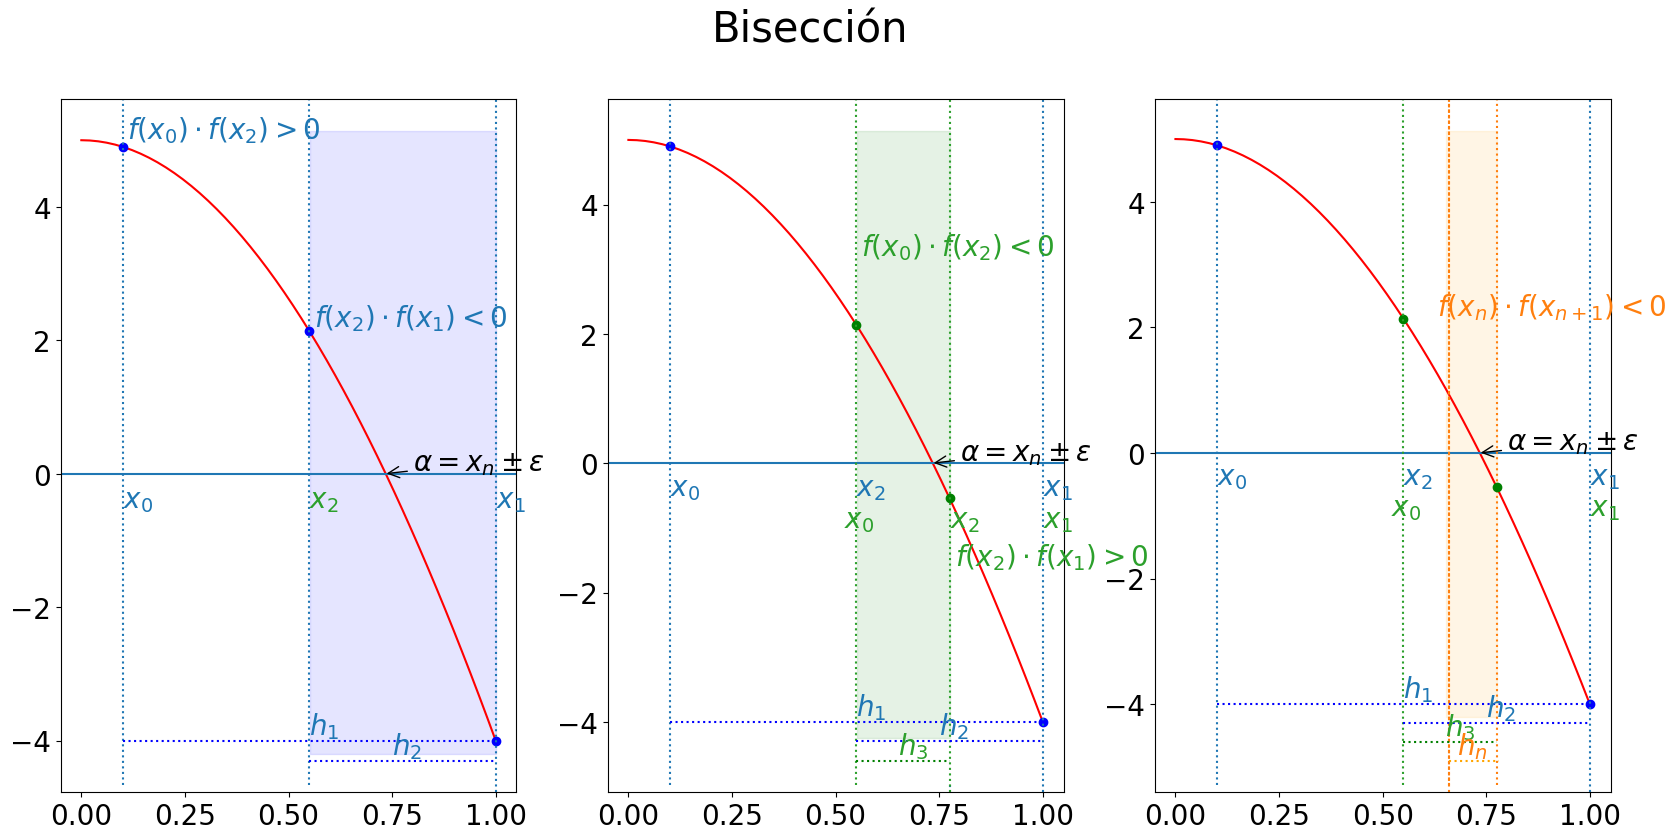

In [ ]:
#from matplotlib import *
import matplotlib.pyplot as plt
from numpy import *

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8] # ancho, alto de figuras
plt.rcParams["font.size"] = 20

f=lambda x: x**3-10*x**2+5

def grafica_biseccion(f,x0,x1):
    x2=(x1+x0)/2
    x = linspace(0, 1)
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 9))
    fig.suptitle('Bisección', fontsize=30)
    #paso 1
    ax1.plot(x, f(x), 'r', x0, f(x0),'ob',x1, f(x1),'ob',x2,f(x2),'ob')
    ax1.axhline()
    ax1.axvline(x=x0, ymin=0.01, ymax=f(x0),linestyle=':',color='tab:blue')
    ax1.axvline(x=x1,linestyle=':',color='tab:blue')
    ax1.axvline(x=x2, ymin=0.01, ymax=f(x2),linestyle=':',color='tab:blue')
    ax1.annotate(r"$\alpha=x_n\pm \epsilon$", xy=[0.73, 0], xytext=[0.8, 0.05],
                 arrowprops=dict(arrowstyle='->'),)
    ax1.annotate(r"$x_{0}$", xy=[x0, 0], xytext=[x0, -0.5],color='tab:blue')
    ax1.annotate(r"$x_{1}$", xy=[x1, 0], xytext=[x1, -0.5],color='tab:blue')
    ax1.annotate(r"$x_{2}$", xy=[x2, 0], xytext=[x2, -0.5],color='tab:green')
    ax1.annotate(r"$f(x_{0})\cdot f(x_{2})>0$", xy=[x0+0.01, f(x0)], textcoords='offset points',xytext=[x0 + 0.05, f(x0) + 1],
                color='tab:blue')
    ax1.annotate(r"$f(x_{2})\cdot f(x_{1})<0$", xy=[x2+0.01, f(x2)], textcoords='offset points',xytext=[x2 + 0.05, f(x2) + 1],
                color='tab:blue')
    ax1.fill_between(x, f(x2)+3,f(x1)-0.2,where=f(x) < 2.2, color='blue', alpha=.1)
    ax1.hlines(-4.0, x0, x1, colors='b', linestyles=':')
    ax1.hlines(-4.3, x2, x1, colors='b', linestyles=':')
    ax1.annotate(r"$h_{1}$", xy=[0.05, 0.5], xytext=[x2, -3.9],color='tab:blue')
    ax1.annotate(r"$h_{2}$", xy=[0.05, 0.5], xytext=[0.75, -4.2],color='tab:blue')

    #paso 2
    ax2.plot(x, f(x), 'r', x0, f(x0),'ob',x1, f(x1),'ob',x2,f(x2),'og')
    ax2.axhline()
    ax2.axvline(x=x0, ymin=0.01, ymax=f(x0),linestyle=':',color='tab:blue')
    ax2.axvline(x=x1,linestyle=':',color='tab:blue')
    ax2.axvline(x=x2, ymin=0.01, ymax=f(x2),linestyle=':',color='tab:green')
    ax2.annotate(r"$\alpha=x_n\pm \epsilon$", xy=[0.73, 0], xytext=[0.8, 0.05],
                 arrowprops=dict(arrowstyle='->'),)
    ax2.annotate(r"$x_{0}$", xy=[x0, 0], xytext=[x0, -0.5],color='tab:blue')
    ax2.annotate(r"$x_{1}$", xy=[x1, 0], xytext=[x1, -0.5],color='tab:blue')
    ax2.annotate(r"$x_{2}$", xy=[x2, 0], xytext=[x2, -0.5],color='tab:blue')
    ax2.annotate(r"$x_{0}$", xy=[x2, 0], xytext=[x2-0.03, -1],color='tab:green')
    ax2.annotate(r"$x_{1}$", xy=[x1, -1], xytext=[x1, -1],color='tab:green')
    x2_nueva=(x2+x1)/2
    ax2.plot(x2_nueva,f(x2_nueva),'og')
    ax2.annotate(r"$x_{2}$", xy=[x2_nueva, -1], xytext=[x2_nueva, -1],color='tab:green')
    ax2.axvline(x=x2_nueva, ymin=0.01, ymax=f(x2_nueva),linestyle=':',color='tab:blue')
    ax2.axvline(x=x2_nueva,linestyle=':',color='tab:green');
    ax2.annotate(r"$f(x_{0})\cdot f(x_{2})<0$", xy=[x2+0.01, f(x2)+1], textcoords='offset points',xytext=[x2+ 0.05, f(x2) +1],
                color='tab:green')
    ax2.fill_between(x, f(x2)+3,f(x2_nueva)-3.7,where=(x2_nueva+0.001>=x) & (x>x2), color='green', alpha=.1)
    ax2.annotate(r"$f(x_{2})\cdot f(x_{1})>0$", xy=[x2_nueva+0.01, f(x2_nueva)-1], textcoords='offset points',xytext=[x2_nueva+ 0.05, f(x2_nueva)-1],
                color='tab:green')
    ax2.hlines(-4.0, x0, x1, colors='b', linestyles=':')
    ax2.hlines(-4.3, x2, x1, colors='b', linestyles=':')
    ax2.hlines(-4.6, x2, x2_nueva, colors='g', linestyles=':')
    ax2.annotate(r"$h_{1}$", xy=[0.05, 0.5], xytext=[x2, -3.9],color='tab:blue')
    ax2.annotate(r"$h_{2}$", xy=[0.05, 0.5], xytext=[0.75, -4.2],color='tab:blue')
    ax2.annotate(r"$h_{3}$", xy=[0.05, 0.5], xytext=[0.65, -4.5],color='tab:green')


    #n-ésimo paso
    ax3.plot(x, f(x), 'r', x0, f(x0),'ob',x1, f(x1),'ob',x2,f(x2),'og')
    ax3.axhline()
    ax3.axvline(x=x0, ymin=0.01, ymax=f(x0),linestyle=':',color='tab:blue')
    ax3.axvline(x=x1,linestyle=':',color='tab:blue')
    ax3.axvline(x=x2, ymin=0.01, ymax=f(x2),linestyle=':',color='tab:green')
    ax3.axvline(x=x2_nueva, ymin=0.01, ymax=f(x2),linestyle=':',color='tab:orange')
    ax3.annotate(r"$\alpha=x_n\pm \epsilon$", xy=[0.73, 0], xytext=[0.8, 0.05],
                 arrowprops=dict(arrowstyle='->'),)
    ax3.annotate(r"$x_{0}$", xy=[x0, 0], xytext=[x0, -0.5],color='tab:blue')
    ax3.annotate(r"$x_{1}$", xy=[x1, 0], xytext=[x1, -0.5],color='tab:blue')
    ax3.annotate(r"$x_{2}$", xy=[x2, 0], xytext=[x2, -0.5],color='tab:blue')
    ax3.annotate(r"$x_{0}$", xy=[x2, 0], xytext=[x2-0.03, -1],color='tab:green')
    ax3.annotate(r"$x_{1}$", xy=[x1, -1], xytext=[x1, -1],color='tab:green')
    xn=0.73-0.07
    xn_1=0.73+0.05
    ax3.axvline(x=xn,linestyle=':',color='tab:orange')
    ax3.axvline(x=xn, ymin=0.01, ymax=f(x2),linestyle=':',color='tab:orange')
    ax3.plot(x2_nueva,f(x2_nueva),'og')
    ax3.annotate(r"$f(x_{n})\cdot f(x_{n+1})<0$", xy=[x2+0.08, f(x2)], textcoords='offset points',xytext=[x2+0.08, f(x2)],
            color='tab:orange')
    plt.fill_between(x, f(xn)+4.2,f(xn_1)-3.6,where=(xn_1+0.01>=x) & (x+0.01>xn), color='orange', alpha=.1)
    ax3.hlines(-4.0, x0, x1, colors='b', linestyles=':')
    ax3.hlines(-4.3, x2, x1, colors='b', linestyles=':')
    ax3.hlines(-4.6, x2, x2_nueva, colors='g', linestyles=':')
    ax3.hlines(-4.9, xn, xn_1, colors='orange', linestyles=':')
    ax3.annotate(r"$h_{1}$", xy=[0.05, 0.5], xytext=[x2, -3.9],color='tab:blue')
    ax3.annotate(r"$h_{2}$", xy=[0.05, 0.5], xytext=[0.75, -4.2],color='tab:blue')
    ax3.annotate(r"$h_{3}$", xy=[0.05, 0.5], xytext=[0.65, -4.5],color='tab:green')
    ax3.annotate(r"$h_{n}$", xy=[0.05, 0.5], xytext=[0.68, -4.8],color='tab:orange')


grafica_biseccion(f,0.1,1)

In [ ]:
#Biseccion
def biseccion(f,a,b,epsilon=1e-6):
  ##tu codigo
  x0,x1,n=a,b,0
  while abs(x0-x1)>epsilon:
    x2=(x0+x1)/2
    n=n+1
    if f(x0)*f(x2)<0: #intervalo izq
      x1=x2
    elif f(x1)*f(x2)<0: #int der
      x0=x2
  return x1,n

f=lambda x: x**3-10*x**2+5
print(biseccion(f,0,0.8,1e-10))

(0.7346035078167915, 33)


In [ ]:
import pandas as pd
l_biseccion = []
idx = []
valor_real=0.7346035077893032 #valor obtenido con tolerancia de 10-17
for i in range(1,10):
    tol = 10**(-i)
    idx.append(tol)
    raiz=biseccion(f,0,0.8,tol) #cada renglon de la tabla
    error=(abs(valor_real-raiz[0])/valor_real)*100
    l_biseccion.append([raiz[0],raiz[1],error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %
1.000000e-01,0.800000,3,8.902284e+00
1.000000e-02,0.737500,7,3.942933e-01
1.000000e-03,0.735156,10,7.524361e-02
1.000000e-04,0.734668,13,8.774932e-03
1.000000e-05,0.734607,17,4.663474e-04
1.000000e-06,0.734604,20,5.091817e-05
1.000000e-07,0.734604,23,1.197167e-05
1.000000e-08,0.734604,27,6.122809e-07
1.000000e-09,0.734604,30,3.741929e-09


#### Ventajas

1. Siempre converge
2. Límite de error garantizado, baja con cada iteración.
3. ¡¡¡ Error se reduce a un medio con cada iteración !!!


#### Desventajas
1. Convergencia lenta para funciones con múltiples derivadas continuas en la región del cero $\alpha$.


## Método de Newton-Raphson

Es uno de los mejores y más rápidos métodos para encontrar raíces. Este método usa la expansión en series de Taylor.

$$
f(x_{i+1})=f(x_i)+f'(x_{i})(x_{i+1}-x_i)+O(x_{i+1}-x_i)^2
$$

Si $x_{i+1}$ es la raíz $f(x_{i+1})=0$, nos quedamos sólo con los términos lineales

$$
0=f(x_i)+f'(x_i)(x_{i+1}-x_i)
$$

Despejamos $x_{i+1}$

$$
x_{i+1}=x_{i}-\frac{f(x_i)}{f'(x_i)}
$$

Y esta es nuestra sucesión que se tendrá que programar.

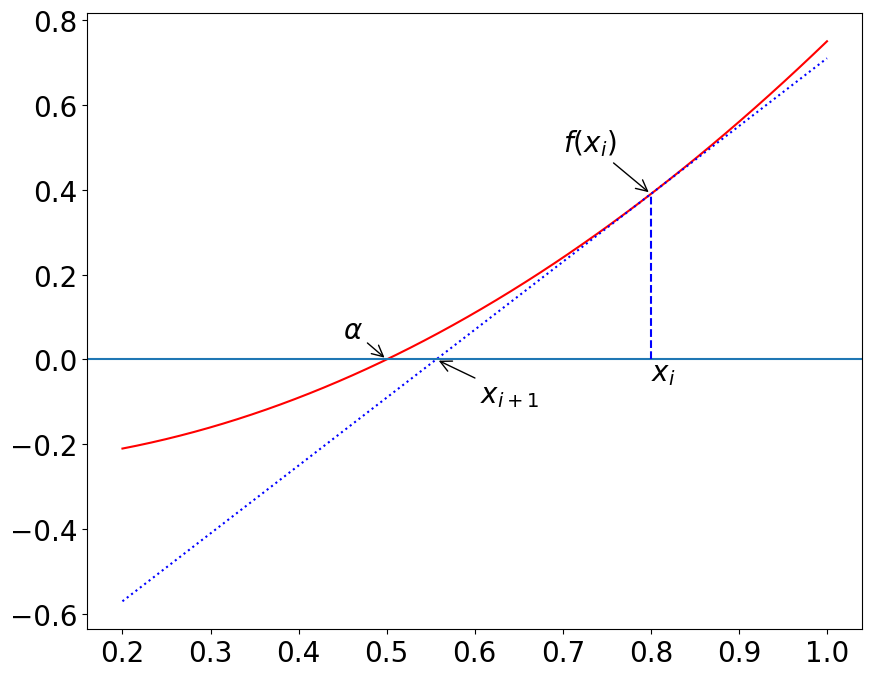

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8] # ancho, alto de figuras
plt.rcParams["font.size"] = 20
# Plot metodo de Newton
def funcion(x):
    return x**2 - 0.25
def taylor(x, x0):
    sl = 2*x0
    return sl*x - sl*x0 + funcion(x0)
def fp0(x0):
    sl = 2*x0
    return x0 - funcion(x0)/sl

def fplot():
    x0 = 0.8
    x = np.linspace(0.2, 1)
    plt.plot(x, funcion(x), 'r', x, taylor(x, x0), 'b:')
    plt.axhline();
    plt.annotate(r"$\alpha$", xy=[0.5, 0], xytext=[0.45, 0.05],
                 arrowprops=dict(arrowstyle='->'),)
    plt.annotate(r"$x_{i+1}$", xy=[fp0(x0), 0], xytext=[fp0(x0)+0.05, -0.1],
                 arrowprops=dict(arrowstyle='->'),)
    plt.annotate(r"$x_{i}$", xy=[x0, 0], xytext=[x0, -0.05],)
    plt.annotate(r"$f(x_{i})$", xy=[x0, funcion(x0)], xytext=[x0 - 0.1, funcion(x0) + 0.1],
                 arrowprops=dict(arrowstyle='->'),);
    plt.plot([x0, x0], [0, funcion(x0)], 'b--')

fplot()

In [ ]:
#Tu código de Newton
def newton(f,df,x0,epsilon=1e-6):
  ##tu codigo
  dx=2*epsilon#inicio arbitrario
  contador = 0
  while dx>epsilon and contador < 1000:
    #algo
    x1 = x0 - f(x0)/df(x0)
    dx=abs(x0-x1)
    x0 = x1
    contador += 1
  return x1,contador

In [ ]:
f = lambda x: x**3 - 10*x**2 + 5
df = lambda x: 3*(x**2) - 20*x
print(newton(f,df,0.8,1e-10))

(0.7346035077893033, 4)


#### Ventajas

1. Convergencia rápida en la mayoría de los casos.
2. Formulación sencilla, por lo tanto fácil de usar y programar.
3. Construcción intuitiva. Entonces fácil de entender su comportamiento y convergencia.

#### Desventajas

1. No siempre converge.
2. Problematico cuando $f'(\alpha) = 0$. En este caso, el eje $x$ es tangente a $f$ en $\alpha$.
3. Require el conocimiento de $f(x)$ y de $f'(x)$. En comparación, el metodo de bisección requiere solamente $f(x)$.

## Estimación del error

Usamos la expansión de Taylor cerca de $x = x_n$ para calcular $f(\alpha)$.
\begin{align}
0 &= f(\alpha)\\
  &= f(x_n) + (\alpha - x_n) f'(x_n) + \frac{1}{2} (\alpha - x_n)^2 f''(c_n)\\
\end{align}
con $c_n$ entre $\alpha$ y $x_n$. Dividimos por $f'(x_n)$ para obtener:
$$ 0 = \frac{f(x_n)}{f'(x_n)} + \alpha - x_n + (\alpha - x_n)^2 \frac{f''(c_n)}{2 f'(x_n)} $$
Utilizamos
$$ \frac{f(x_n)}{f'(x_n)} - x_n = - x_{n+1} $$
y obtenemos
$$ \alpha - x_{n+1} = -\frac{f''(c_n)}{2 f'(x_n)} (\alpha - x_n) ^2 $$


Para $x_n$ cerca de $\alpha$ tenemos $c_n$ cerca de $\alpha$.
$$ \alpha - x_{n+1} \approx = -\frac{f''(\alpha)}{2f'(\alpha)} (\alpha - x_n)^2 $$
Eso nos dice que el metodo de Newton tiene *convergencia cuadrática* con las condiciones
1. $f'(\alpha) \not= 0$
2. $f$ puede diferenciarse dos veces en la vecindad de $\alpha$.

## Método de la secante

En el método de Newton aproximamos $f(x)$ por la recta secante (que corta a la función en dos puntos).

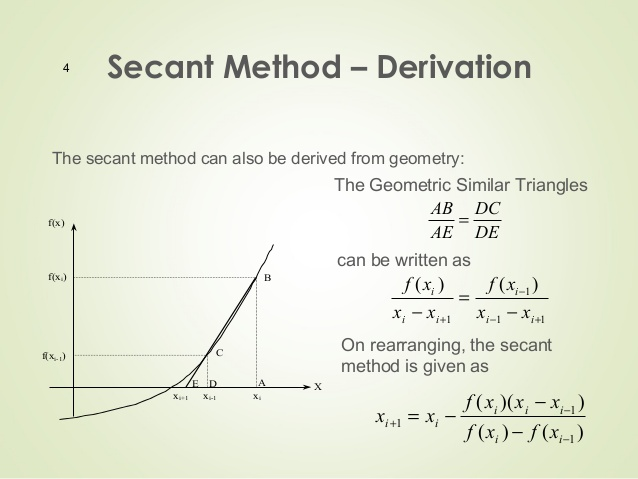

In [ ]:
from IPython.display import Image
Image("secante2.jpeg")

Otra forma de obtener el método, es tomar la interpolación líneal de la forma $$ q(x) = a_0 + a_1 x, $$ para lo cual se necesitan dos estimaciones de $x_0$ y $x_1$ para $\alpha$. Con las condiciones
$$ q(x_0) = f(x_0), \qquad q(x_1) = f(x_1) $$
Esta función también se llama *secante* de $f$ y es de la forma
$$ q(x) = \frac{(x_1 - x) f(x_0) + (x - x_0) f(x_1)}{x_1 - x_0}$$

Siguiente paso:

Tenemos que encontrar la solución para
$$ 0 = q(x_2) = \frac{(x_1 - x_2) f(x_0) + (x_2 - x_0) f(x_1)}{x_1 - x_0} $$
El numerador será cero, tal que:
$$ x_2 = \frac{f(x_1) x_0 - f(x_0) x_1}{f(x_1) - f(x_0)} $$

Esta expresión puede presentar una perdida de precisión, (división de números muy pequeños). Es mejor (computacionalmente) hacer el álgebra y expresar el método de la siguiente forma:
$$ x_2 = x_1 - f(x_1) \left(\frac{f(x_1) - f(x_0)}{x_1 - x_0}\right)^{-1} $$
Iterando n-veces:
$$
x_{n+1} = x_n - f(x_n) \left(\frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}\right)^{-1}, \qquad
  n = 1, 2, 3, \dots    
$$

Buscamos la raiz de $f(x) = x^6 - x - 1$ con los estimados iniciales $x_0 = 2$ y $x_1 = 1$.

In [ ]:
def f(x):
    return x**6 - x - 1

In [ ]:
def secante(f, x0, x1, delta=1e-9):
    f0 = f(x0)
    f1 = f(x1)
    res = [[x0, f(x0), np.nan], #nan es el paso inicial del Data Frame
           [x1, f(x1), x1 - x0],]
    while True:
        x2 = x1 - f1 * ((f1 - f0) / (x1 - x0))**(-1) #secante
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(f2) < delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
    return res

In [ ]:
res = secante(f, 2, 1)
#pd.set_option("precision", 15)
pd.DataFrame(res, index=range(len(res)),
                  columns=["$x_n$", "$f(x_n)$", "$x_n - x_{n-1}$"])

,$x_n$,$f(x_n)$,$x_n - x_{n-1}$
0,2.000000,6.100000e+01,NaN
1,1.000000,-1.000000e+00,-1.000000e+00
2,1.016129,-9.153677e-01,1.612903e-02
3,1.190578,6.574657e-01,1.744487e-01
4,1.117656,-1.684912e-01,-7.292194e-02
5,1.132532,-2.243729e-02,1.487572e-02
6,1.134817,9.535641e-04,2.285258e-03
7,1.134724,-5.066166e-06,-9.316206e-05
8,1.134724,-1.134763e-09,4.923425e-07
9,1.134724,1.554312e-15,1.103038e-10


Converge más lento que Newton, pero no necesitamos conocer la derivada $f'(x)$.


### Otra deducción del método de la secante

Puede verse como una aproximación al método de Newton,
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$
sustituimos la definición de la derivada.
$$ f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}} $$

## Estimación del error

Usamos la expansión de Taylor cerca de $x = x_n$ para calcular $f(\alpha)$.
\begin{align}
0 &= f(\alpha)\\
  &= f(x_n) + (\alpha - x_n) f'(x_n) + \frac{1}{2} (\alpha - x_n)^2 f''(\xi_n)\\
\end{align}
con $\xi_n$ entre $\alpha$ y $x_n$. Dividimos por $f'(x_n)$ para obtener:
$$ 0 = \frac{f(x_n)}{f'(x_n)} + \alpha - x_n + (\alpha - x_n)^2 \frac{f''(\xi_n)}{2 f'(x_n)} $$
Donde volvemos a obtener el método de la secante
$$ \frac{f(x_n)}{f'(x_n)} - x_n = - x_{n+1} $$
Con un error (que es lo que desprecimos)
$$ \alpha - x_{n+1} = -\frac{f''(\xi)}{2 f'(x_n)} (\alpha - x_n) ^2 $$


## Análisis de Convergencia

Extendiendo la serie a infinito $\lim_{n \to \infty} x_{n+1}=\alpha$, por lo que:
$$
\lim_{n \to \infty} \frac{|\alpha - x_{n+1}|}{|\alpha - x_n|^r}
  = \left| \frac{f''(\alpha)}{2 f'(\alpha)} \right|^{r-1}
  \equiv c
$$
con $r = 1/2 (1+\sqrt{5}) \approx 1.62$. Para que se cumple hay que suponer que $x_0$ y $x_1$ están suficientemente cerca a $\alpha$. También hay que requere que $f$ tiene dos derivadas continuas en un intervalo alrededor de $\alpha$.

Nos dice sobre el error de $x_n$
$$ |\alpha - x_{n+1}| \approx c |\alpha - x_n|^r $$

Se parece mucho al caso del metodo de Newton con
$$ \alpha - x_{n+1} \approx M\,(\alpha - x_n)^2, \qquad M = - \frac{f''(\alpha)}{2f'(\alpha)} $$

Ambos metodos tienen convergencia más rápida que lineal, se llaman *metodos superlineales*.

Para $x_n$ cerca de $\alpha$ tenemos $c_n$ cerca de $\alpha$.
$$ \alpha - x_{n+1} \approx = -\frac{f''(\alpha)}{2f'(\alpha)} (\alpha - x_n)^2 $$
Eso nos dice que el metodo de Newton tiene *convergencia cuadrática* con las condiciones
1. $f'(\alpha) \not= 0$
2. $f$ puede diferenciarse dos veces en la vecindad de $\alpha$.

## Comparación de costo computacional entre Newton y Secante

Para el método de Newton tenemos
$$ x_{n+1} = x_n + \frac{f(x_n)}{f'(x_n)} $$
Para cada itereación  hay que **evaluar dos funciones** ($f(x_n)$ y $f'(x_n)$), es decir

En el metodo del secante tenemos
$$
x_{n+1} = x_n - f(x_n) \left(\frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}\right)^{-1}
$$
que requiere solamente la evaluación de $f(x_n)$, guardamos $f(x_{n-1})$ de la iteración anterior. Entonces require solmante **una evaluación de una función** por iteración.

Por eso es muchas veces más rápido utilizar el metodo del secante, aún que requiere más iteraciónes, que el metodo de Newton.

## Ventajas y desventajas

### Ventajas

1. Convergencia superlineal.
2. No requiere el uso de la derivada.
3. Solamente requiere una evaluación de la función por iteración.

### Desventajas

1. No siempre converge.
2. No hay limite garantizado para el error.
3. Tipicamente tiene problemas cuando $f'(\alpha) = 0$.
4. El metodo de Newton se generaliza más fácilmente a sistemas de ecuaciones no-lineales.

# Método de Ridders

Suponemos que la raíz está en el intervalo ($x_0$,$x_1$). En este intervalo, tomamos el punto medio $x_2$ y evaluamos f($x_2$), ver figura. Decimos que existe una función:
$$g(x)=f(x)e^{(x-x_1)}Q$$

con una $Q$ tal que $x_0$, $x_1$ y $x_2$ están unidos por una recta. Definimos las evaluaciones de los puntos $f$'s como $f_0=f(x_0)$, $f_1=f(x_1)$ y $f_2=f(x_2)$. Si hacemos la transformación de los puntos, tenemos que los puntos $g$'s se relacionan con los $f$'s por:
\begin{align}
g_0=g(x_0)&=f_0\\
g_1=g(x_1)&= f_1e^{2hQ}\\
g_2=g(x_2)&= f_2e^{hQ}
\end{align}

Por la construcción de la recta $g(x)$ monótona creciente, se tiene que:
$$g_2=\frac{g_0+g_1}{2}$$
Sustituyendo los valores de las $g$'s en términos de $f$'s:

$$f_2 e^{hQ}=\frac{1}{2} \left[f_0+f_1e^{2hQ} \right]$$

Que es una ecuación cuadrática con $x=e^{hQ}$, la solución a la cuadrática es:
$$e^{hQ}=\frac{f_2\pm \sqrt{f_2^2-f_0f_1}}{f_1}$$.

Nota: La genialidad del método consiste en usar la función exponencial para crear la transformación de los puntos. La exponencial es una función estrictamente positiva y monotona creciente, lo que significa que ponderar los tres puntos con un exponencial no cambiará sus signos. Por lo tanto, la raíz de la linealización tendrá que aterrizar dentro del intervalo original.

Los polinomios, las funciones racionales, las sinusoidales y los logaritmos tienen puntos positivos y negativos, por lo que su uso probablemente conlleva el riesgo de obtener malas raíces interpoladas.

Una función constante también es técnicamente de un sólo signo y monótona creciente, pero no cumpliría con la propiedad de ser lineal en $x_0$, $x_1$ y $x_2$.

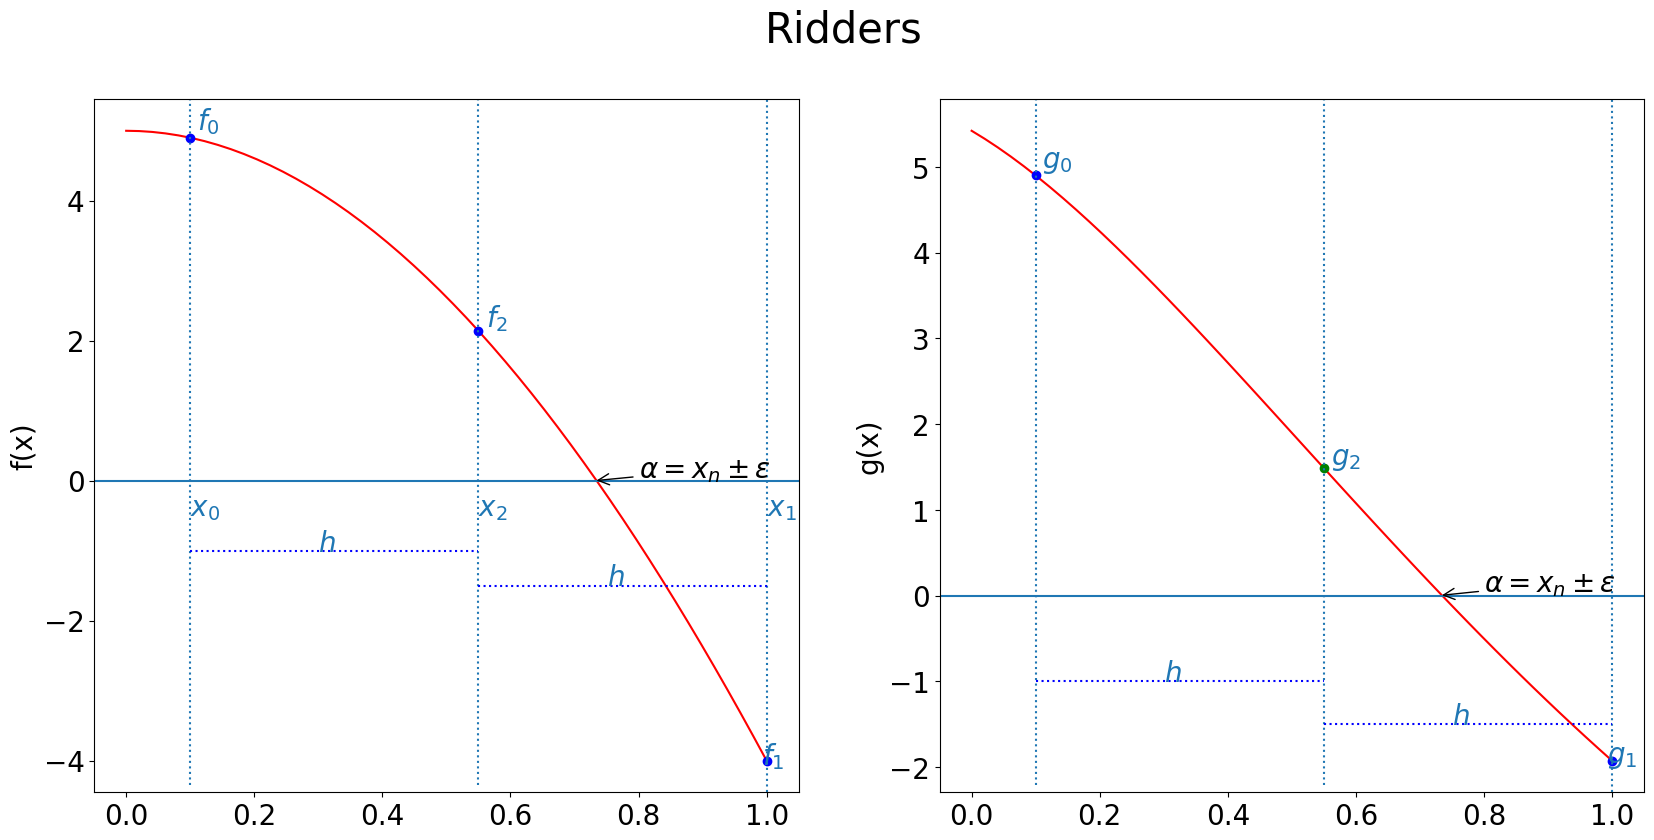

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8] # ancho, alto de figuras
plt.rcParams["font.size"] = 20

f=lambda x: x**3-10*x**2+5

def g(f,x0,x1,x):#Transformación de Ridders
  x2=(x0+x1)/2
  h=abs(x2-x0)
  Q=(np.log((f(x2)-np.sqrt(f(x2)**2-f(x0)*f(x1)))/f(x1)))/h #signo negativo porque es una función defreciente
  y=f(x)*e**((x-x0)*Q)
  return y

def grafica_ridders(f,x0,x1):
    x2=(x1+x0)/2
    x = linspace(0, 1)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9))
    fig.suptitle('Ridders', fontsize=30)
    #Función en el espacio f(x)
    ax1.plot(x, f(x), 'r', x0, f(x0),'ob',x1, f(x1),'ob',x2,f(x2),'ob')
    ax1.axhline()
    ax1.axvline(x=x0, ymin=0.01, ymax=f(x0),linestyle=':',color='tab:blue')
    ax1.axvline(x=x1,linestyle=':',color='tab:blue')
    ax1.axvline(x=x2, ymin=0.01, ymax=f(x2),linestyle=':',color='tab:blue')
    ax1.annotate(r"$\alpha=x_n\pm \epsilon$", xy=[0.73, 0], xytext=[0.8, 0.05],
                 arrowprops=dict(arrowstyle='->'),)
    ax1.annotate(r"$x_{0}$", xy=[x0, 0], xytext=[x0, -0.5],color='tab:blue')
    ax1.annotate(r"$x_{1}$", xy=[x1, 0], xytext=[x1, -0.5],color='tab:blue')
    ax1.annotate(r"$x_{2}$", xy=[x2, 0], xytext=[x2, -0.5],color='tab:blue')
    ax1.hlines(-1.0, x0, x2, colors='b', linestyles=':')
    ax1.hlines(-1.5, x2, x1, colors='b', linestyles=':')
    ax1.annotate(r"$h$", xy=[0.05, 0.5], xytext=[0.3, -1],color='tab:blue')
    ax1.annotate(r"$h$", xy=[0.05, 0.5], xytext=[0.75, -1.5],color='tab:blue')
    ax1.annotate(r"$f_0$", xy=[x0+0.01, f(x0)], textcoords='offset points',xytext=[x0 + 0.05, f(x0) + 1],
            color='tab:blue')
    ax1.annotate(r"$f_1$", xy=[x1-0.01, f(x1)], textcoords='offset points',xytext=[x1 - 0.05, f(x1) + 1],
          color='tab:blue')
    ax1.annotate(r"$f_2$", xy=[x2+0.01, f(x2)], textcoords='offset points',xytext=[x2 + 0.05, f(x2) + 1],
          color='tab:blue')
    ax1.set_ylabel(r"f(x)")

#Transformando la función al espacio g
    g0=g(f,x0,x1,x0) #g(f,x0,x1,x)
    g1=g(f,x0,x1,x1)
    g2=g(f,x0,x1,x2)
    ax2.plot(x, g(f,x0,x1,x), 'r', x0, g0,'ob',x1, g1,'ob',x2,g2,'og')
    ax2.axhline()
    ax2.axvline(x=x0, ymin=0.01, ymax=f(x0),linestyle=':',color='tab:blue')
    ax2.axvline(x=x1,linestyle=':',color='tab:blue')
    ax2.axvline(x=x2, ymin=0.01, ymax=f(x2),linestyle=':',color='tab:blue')
    ax2.annotate(r"$\alpha=x_n\pm \epsilon$", xy=[0.73, 0], xytext=[0.8, 0.05],
                 arrowprops=dict(arrowstyle='->'),)
    ax2.annotate(r"$g_0$", xy=[x0+0.01, g0], textcoords='offset points',xytext=[x0 + 0.05, g0 + 1],
            color='tab:blue')
    ax2.annotate(r"$g_1$", xy=[x1-0.01, g1], textcoords='offset points',xytext=[x1 - 0.05, g1 + 1],
          color='tab:blue')
    ax2.annotate(r"$g_2$", xy=[x2+0.01, g2], textcoords='offset points',xytext=[x2 + 0.05, g2 + 1],
          color='tab:blue')
    ax2.set_ylabel(r"g(x)")
    ax2.hlines(-1.0, x0, x2, colors='b', linestyles=':')
    ax2.hlines(-1.5, x2, x1, colors='b', linestyles=':')
    ax2.annotate(r"$h$", xy=[0.05, 0.5], xytext=[0.3, -1],color='tab:blue')
    ax2.annotate(r"$h$", xy=[0.05, 0.5], xytext=[0.75, -1.5],color='tab:blue')

grafica_ridders(f,0.1,1)

Ya con la transformación definida, podemos encontrar la raíz con la función g (que es lineal) y traérla a $f$. Para resolver la raíz $x_3$.

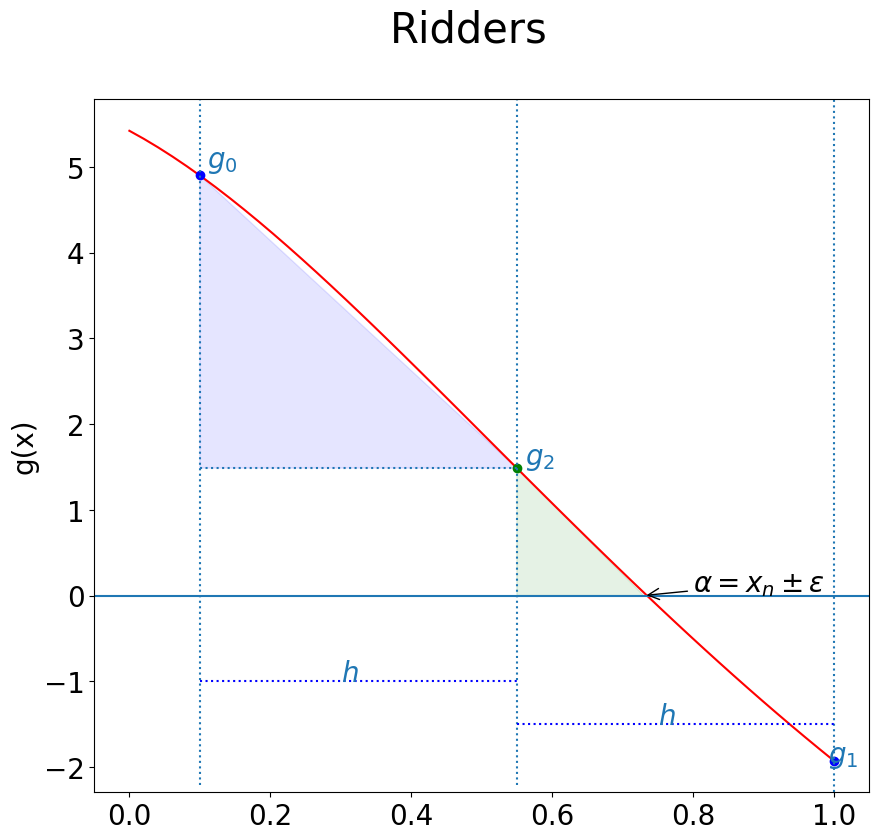

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8] # ancho, alto de figuras
plt.rcParams["font.size"] = 20

f=lambda x: x**3-10*x**2+5

def g(f,x0,x1,x):#Transformación de Ridders
  x2=(x0+x1)/2
  h=abs(x2-x0)
  Q=(np.log((f(x2)-np.sqrt(f(x2)**2-f(x0)*f(x1)))/f(x1)))/h #signo negativo porque es una función defreciente
  y=f(x)*e**((x-x0)*Q)
  return y

def grafica_ridders(f,x0,x1):
    x2=(x1+x0)/2
    x = linspace(0, 1)
    fig, (ax2) = plt.subplots(ncols=1, figsize=(10, 9))
    fig.suptitle('Ridders', fontsize=30)
#Transformando la función al espacio g
    g0=g(f,x0,x1,x0) #g(f,x0,x1,x)
    g1=g(f,x0,x1,x1)
    g2=g(f,x0,x1,x2)
    ax2.plot(x, g(f,x0,x1,x), 'r', x0, g0,'ob',x1, g1,'ob',x2,g2,'og')
    ax2.axhline()
    ax2.axvline(x=x0, ymin=0.01, ymax=f(x0),linestyle=':',color='tab:blue')
    ax2.axvline(x=x1,linestyle=':',color='tab:blue')
    ax2.axvline(x=x2, ymin=0.01, ymax=f(x2),linestyle=':',color='tab:blue')
    ax2.annotate(r"$\alpha=x_n\pm \epsilon$", xy=[0.73, 0], xytext=[0.8, 0.05],
                 arrowprops=dict(arrowstyle='->'),)
    ax2.annotate(r"$g_0$", xy=[x0+0.01, g0], textcoords='offset points',xytext=[x0 + 0.05, g0 + 1],
            color='tab:blue')
    ax2.annotate(r"$g_1$", xy=[x1-0.01, g1], textcoords='offset points',xytext=[x1 - 0.05, g1 + 1],
          color='tab:blue')
    ax2.annotate(r"$g_2$", xy=[x2+0.01, g2], textcoords='offset points',xytext=[x2 + 0.05, g2 + 1],
          color='tab:blue')
    ax2.set_ylabel(r"g(x)")
    ax2.hlines(-1.0, x0, x2, colors='b', linestyles=':')
    ax2.hlines(-1.5, x2, x1, colors='b', linestyles=':')
    ax2.annotate(r"$h$", xy=[0.05, 0.5], xytext=[0.3, -1],color='tab:blue')
    ax2.annotate(r"$h$", xy=[0.05, 0.5], xytext=[0.75, -1.5],color='tab:blue')
    ax2.hlines(g2, x0, x2, colors='tab:blue', linestyles=':')
    #triangulos semejantes
    trianglex = [ x0, x0, x2 ]
    triangley = [ g2, g0, g2]
    triangle2x = [ x2, x2, 0.73]
    triangle2y = [ 0,  g2 , 0 ]
    ax2.fill(trianglex, triangley, color='blue', alpha=.1)
    plt.fill(triangle2x, triangle2y, color='green', alpha=.1)


grafica_ridders(f,0.1,1)

Planteando la semejanza de triángulos:
    $$\frac{g_2}{x_2-x_3} = \frac{g_2-g_0}{x_2-x_0}$$
 con la raíz:

\begin{align}
x_3=&x_2-g_2\frac{x_2-x_0}{g_2-g_0}\\
x_3=&x_2-f_2e^{hQ}\frac{x_2-x_0}{f_1e^{hQ}-f_0}
\end{align}

Sustituyendo la $e^{hQ}$ encontrada arriba, tenemos:

$$x_3=x_2\pm(x_2-x_0)\frac{f_2}{\sqrt{f_2^2-f_0f_1}}$$

Que es la sucesión a iterar del método de Ridders.

Viéndo los signos, en el artículo original, la expresión usada por Ridders es:
    
$$x_3=x_2+sgn(f_0)\frac{f_2}{\sqrt{f_2^2-f_0f_1}}$$

Literal, tomamos el signo de $f_0$ para escoger el signo de la solución. Cómo $f_0$ y $f_1$ tienen signos opuestos, ya que existe la raíz en ese intervalo, el discriminante siempre es positivo.